<a href="https://colab.research.google.com/github/salama4ai/AI-project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is an Exploratory Data Analysis notebook for the assessment project of Mabrains firm

In [1]:
# importing the needed libraries
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot as plt

In [2]:
# increase the maximum display row length, as i need that for certain upcomming cell
pd.set_option('display.max_rows', 63)

In [3]:
# reading the csv file that contains the data
df = pd.read_csv("/content/drive/MyDrive/Mabrains-project/Mabrains-data/simulated_data_nmos.csv")

# Exploratory Data Analysis

In [4]:
# showing up the first 7 columns of df
df.head(7)

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,vth,v_pinch_off,lambda(um),...,gmb(uS),ro(Kohm),cgg(aF),cgs(aF),cgd(aF),cdd(aF),cdb(aF),cgb(aF),csb(aF),corner
0,-0.45,8.0,0.84,0.3,27.0,0.0,0.0,0.402306,-0.45,-0.011819,...,0.197561,3.181189e+06,34032.2445,-28204.18220,-69.122702,88.099279,-4468.207890,-5758.93958,-6638.15046,tt
1,-0.40,8.0,0.84,0.3,27.0,0.0,0.0,0.420865,-0.45,-0.011819,...,0.060563,6.552405e+06,31291.9536,-24561.09330,-64.892149,80.854021,-3789.708030,-6665.96815,-5628.27847,tt
2,-0.35,8.0,0.84,0.3,27.0,0.0,0.0,0.438375,-0.45,-0.011819,...,0.016120,1.321234e+07,28034.5839,-20243.40750,-60.510512,73.904890,-3083.997720,-7730.66594,-4577.23770,tt
3,-0.30,8.0,0.84,0.3,27.0,0.0,0.0,0.454991,-0.45,-0.011819,...,0.003967,3.684764e+07,24469.8762,-15523.22350,-56.971381,68.328120,-2370.676590,-8889.68129,-3514.23439,tt
4,-0.25,8.0,0.84,0.3,27.0,0.0,0.0,0.470835,-0.45,-0.011819,...,0.000886,1.229205e+08,20989.5482,-10919.34920,-55.582426,65.518741,-1701.531230,-10014.61660,-2516.57348,tt
5,-0.20,8.0,0.84,0.3,27.0,0.0,0.0,0.486004,-0.45,-0.011819,...,0.000180,4.327627e+08,18025.3202,-7004.64524,-58.521640,67.790314,-1137.598860,-10962.15330,-1675.27883,tt
6,-0.15,8.0,0.84,0.3,27.0,0.0,0.0,0.500575,-0.45,-0.011819,...,0.000034,1.361104e+09,15843.8855,-4127.15063,-70.952272,80.628608,-716.745221,-11645.78260,-1046.34733,tt


as stated in the problem statment i allowed to use only these columns and i must drop all other columns

In [5]:
# the only allowed columns to use as stated in the problem statment
allowed_columns = ["vds", "L(um)", "W(um)", "drain_length(um)", "temperature", "vgs", "vsb", "corner", "id(uA)"]

In [6]:
# including the allowed columns and excluding any other ones from df
df = df[allowed_columns]

In [7]:
# show the type and non-null values counts of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871488 entries, 0 to 871487
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   vds               871488 non-null  float64
 1   L(um)             871488 non-null  float64
 2   W(um)             871488 non-null  float64
 3   drain_length(um)  871488 non-null  float64
 4   temperature       871488 non-null  float64
 5   vgs               871488 non-null  float64
 6   vsb               871488 non-null  float64
 7   corner            871488 non-null  object 
 8   id(uA)            871488 non-null  float64
dtypes: float64(8), object(1)
memory usage: 59.8+ MB


as we may notice that all columns doesn't contains any null values, and the type of all columns is float64 except the corner column is of object type or categorical column

In [8]:
# check again if the any column contains any null value
df.isna().sum()

# get the same information with another way
df.isnull().sum()

vds                 0
L(um)               0
W(um)               0
drain_length(um)    0
temperature         0
vgs                 0
vsb                 0
corner              0
id(uA)              0
dtype: int64

In [9]:
# show up the columns data types
df.dtypes

vds                 float64
L(um)               float64
W(um)               float64
drain_length(um)    float64
temperature         float64
vgs                 float64
vsb                 float64
corner               object
id(uA)              float64
dtype: object

In [10]:
# show some statistics for the numerical columns of df.
df.describe()

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,id(uA)
count,871488.000000,871488.000000,871488.000000,8.714880e+05,871488.0,871488.000000,871488.000000,871488.000000
mean,1.000138,0.329525,3.664366,3.000000e-01,27.0,0.895708,0.745869,339.674855
std,0.880264,0.431887,6.682675,4.996006e-16,0.0,0.535547,0.513941,1229.868653
min,-0.500000,0.150000,0.360000,3.000000e-01,27.0,0.000000,0.000000,0.000000
25%,0.250000,0.150000,0.650000,3.000000e-01,27.0,0.450000,0.300000,0.000836
50%,1.000000,0.150000,0.940000,3.000000e-01,27.0,0.900000,0.600000,12.420166
75%,1.750000,0.500000,1.000000,3.000000e-01,27.0,1.350000,1.200000,122.021384
max,2.500000,8.000000,25.000000,3.000000e-01,27.0,1.800000,1.500000,14979.728300


as we may notice from the brevious cell the standard deviation of the temperature column is zero. this means that this column contains unique value, and thus this column doesn't affect the output column as it's entropy is zero and thus this columns contains almost zero information, so we can drop it safely, to reduce the curse of dimentionality further.

In [11]:
# let's make sure again that the temperature column has an unique value
df.temperature.value_counts()

#this is another way to get the same information
df.temperature.unique()

array([27.])

In [12]:
# drop the 'temperature' column from df, due to the reason i explained above
df.drop(columns='temperature', inplace=True)

also the same for the 'drain_length(um)' column, the std is very low, so let's check the value counts of this column

In [13]:
# show the value counts of the 'drain_length(um)' column
df["drain_length(um)"].value_counts()

#this is another way to get the same information
# df["drain_length(um)"].unique()

0.3    871488
Name: drain_length(um), dtype: int64

as we saw the 'drain_length(um)' column also contains only one unique value, thus the entropy of this column is almost zero, and thus the information included in this column also almost zero, so in the context of feature engineering we can drop this column safely, to reduce the curse of dimentionality further.

In [14]:
# drop the 'temperature' column from df, due to the reason i explained above
df.drop(columns='drain_length(um)', inplace=True)

note that we can get the same result of droping the columns with the low std using the method of
```sklearn.feature_selection.VarianceThreshold```


In [15]:
# show the dimentions of df
df.shape

(871488, 7)

In [16]:
# show the columns names of df after droping the 'temperature' column
df.columns

Index(['vds', 'L(um)', 'W(um)', 'vgs', 'vsb', 'corner', 'id(uA)'], dtype='object')

let's plot some figures for the data columns to understand them

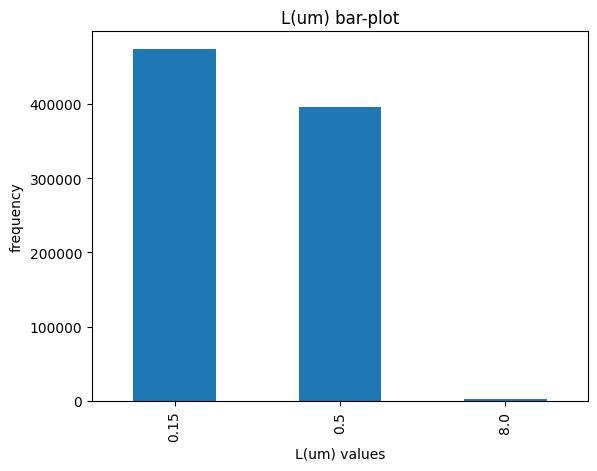

In [17]:
# plot the values and value counts of 'L(um)' column
df['L(um)'].value_counts().plot(kind='bar', title='L(um) bar-plot')
plt.xlabel('L(um) values')
plt.ylabel('frequency')
plt.show()

In [18]:
# show the value counts of 'L(um)' column
df['L(um)'].value_counts()

0.15    473935
0.50    395245
8.00      2308
Name: L(um), dtype: int64

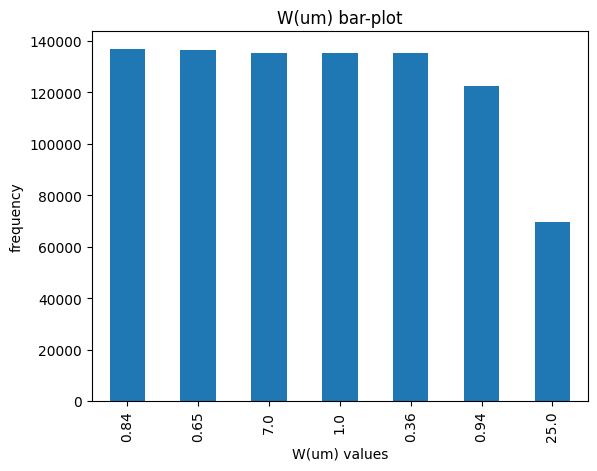

In [19]:
 # plot the values and value counts of 'W(um)' column
df['W(um)'].value_counts().plot(kind='bar', title='W(um) bar-plot')
plt.xlabel('W(um) values')
plt.ylabel('frequency')
plt.show()

In [20]:
# show the value counts of W(um)
df['W(um)'].value_counts()

0.84     136808
0.65     136320
7.00     135410
1.00     135410
0.36     135410
0.94     122417
25.00     69713
Name: W(um), dtype: int64

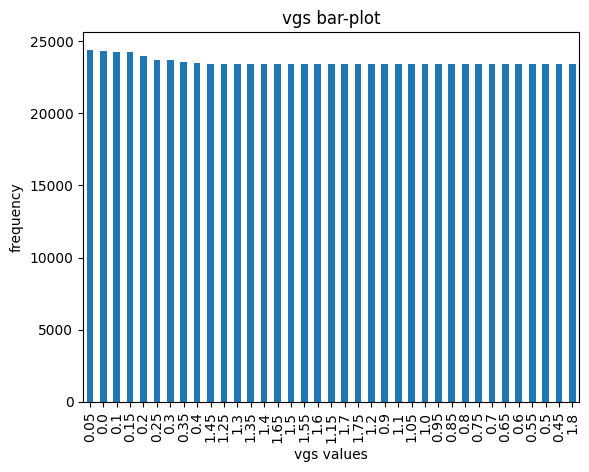

In [21]:
# plot the values and value counts of 'vgs' column
df['vgs'].value_counts().plot(kind='bar', title='vgs bar-plot')
plt.xlabel('vgs values')
plt.ylabel('frequency')
plt.show()

In [22]:
# show the value counts of vgs
df['vgs'].value_counts()

0.05    24400
0.00    24320
0.10    24278
0.15    24217
0.20    23973
0.25    23729
0.30    23668
0.35    23546
0.40    23485
1.45    23424
1.25    23424
1.30    23424
1.35    23424
1.40    23424
1.65    23424
1.50    23424
1.55    23424
1.60    23424
1.15    23424
1.70    23424
1.75    23424
1.20    23424
0.90    23424
1.10    23424
1.05    23424
1.00    23424
0.95    23424
0.85    23424
0.80    23424
0.75    23424
0.70    23424
0.65    23424
0.60    23424
0.55    23424
0.50    23424
0.45    23424
1.80    23424
Name: vgs, dtype: int64

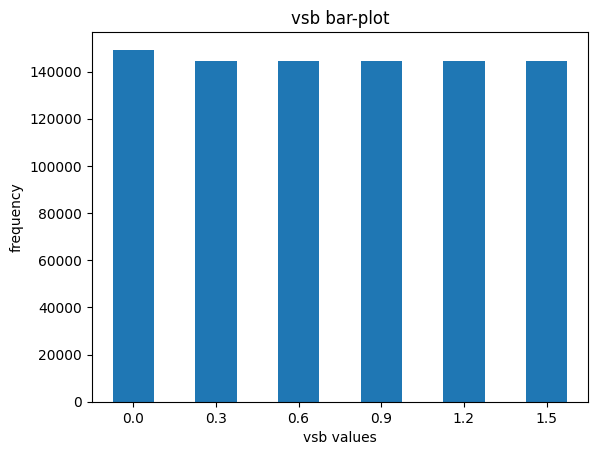

In [23]:
# plot the values and value counts of 'vsb' column
df['vsb'].value_counts().plot(kind='bar', rot=0, title='vsb bar-plot')
plt.xlabel('vsb values')
plt.ylabel('frequency')
plt.show()

In [24]:
# show the value counts of vsb
df['vsb'].value_counts()

0.0    149248
0.3    144448
0.6    144448
0.9    144448
1.2    144448
1.5    144448
Name: vsb, dtype: int64

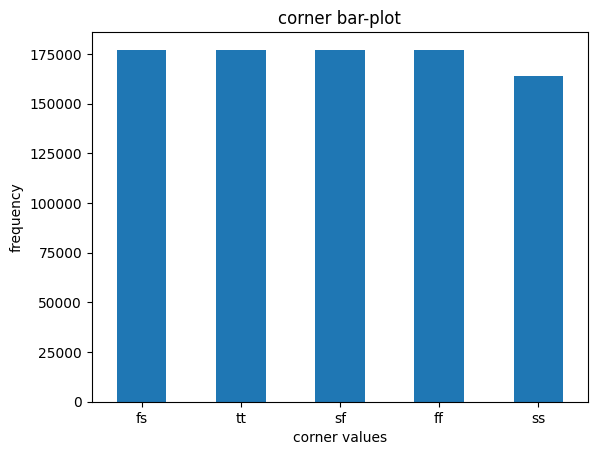

In [25]:
# plot the values and value counts of 'corner' column
df['corner'].value_counts().plot(kind='bar', rot=0, title='corner bar-plot')
plt.xlabel('corner values')
plt.ylabel('frequency')
plt.show()

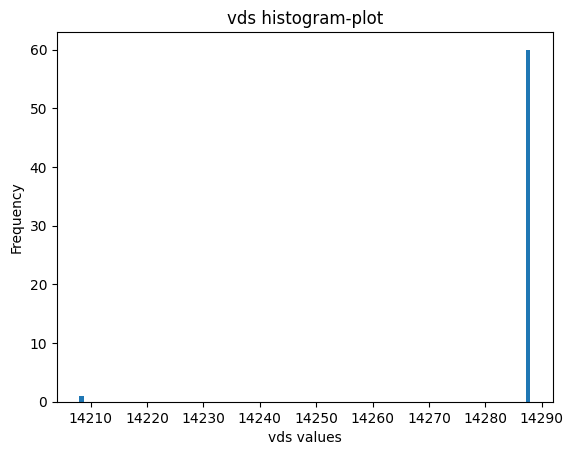

In [26]:
# plot the values and value counts histogram of 'vds' column
df['vds'].value_counts().plot(kind='hist', title='vds histogram-plot', bins=99)
plt.xlabel('vds values')
plt.show()

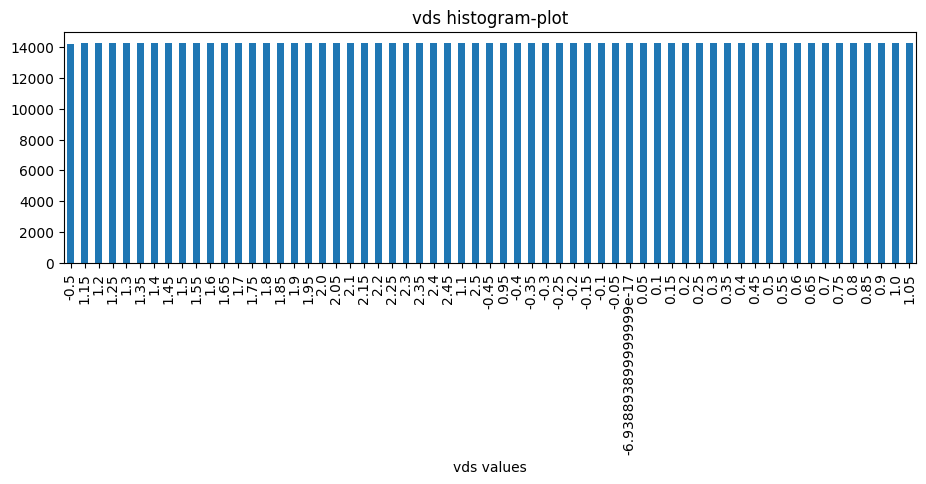

In [27]:
# plot the values and value counts histogram of 'vds' column
plt.figure(figsize=(11,3))
df['vds'].value_counts(ascending=True).plot(kind='bar', title='vds histogram-plot')

plt.xlabel('vds values')
plt.show()

In [28]:
# let's show the boundries of 'vds' values
print(f""" 'vds' values ranges between {df.vds.sort_values().min()} and {df.vds.sort_values().max()}, \n where:- minimum vds value = {df.vds.sort_values().min()}, and maximun vds value = {df.vds.sort_values().max()}""")

 'vds' values ranges between -0.5 and 2.5, 
 where:- minimum vds value = -0.5, and maximun vds value = 2.5


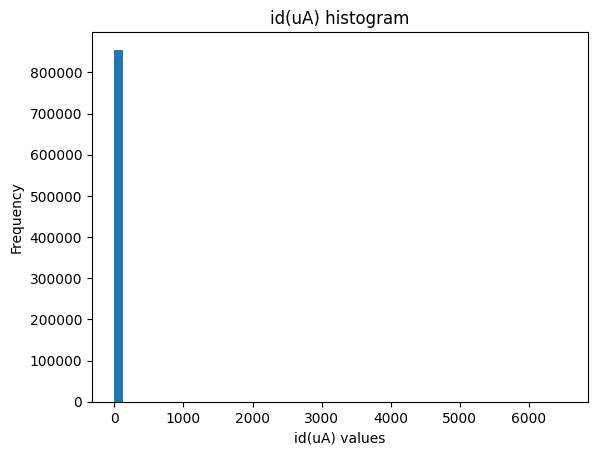

In [29]:
# plot the values and value counts histogram of 'id(uA)' column
df['id(uA)'].value_counts().plot(kind='hist', title="id(uA) histogram", bins=55)
plt.xlabel('id(uA) values')
plt.show()

In [30]:
# the histogram plot of id(uA) doesn't show the value counts, so let's try the value_counts method
df["id(uA)"].value_counts(ascending=False)

0.000000       6528
0.001572          2
10.337158         2
273.748349        2
6973.324300       2
               ... 
3532.274880       1
2976.492510       1
1914.791310       1
1416.729150       1
4438.762770       1
Name: id(uA), Length: 854959, dtype: int64

In [31]:
# save df to csv file
df.to_csv("/content/drive/MyDrive/Mabrains-project/Mabrains-data/mabrains.csv", header=True, index=False)

This notebook written by Ahmad Salama on September 2023

salama4ai@gmail.com

[linkedin.com/in/salama4ai](https://www.linkedin.com/in/salama4ai)
